***certificate_quality_classifier***
As part of my learning journey, a simple comparision between accuracy measurement between logical rule based code and logistic regression model which since our outcome is either Approve or Reject. (binay classification).
As a beginner freindly project, this is easy to understand model

At first we will be implementing a simple logic to classify the certifciate as approved or rejected based on constraints, the contraints could be different in actual, which could reduce the accuracy of the logic implemented in our code.

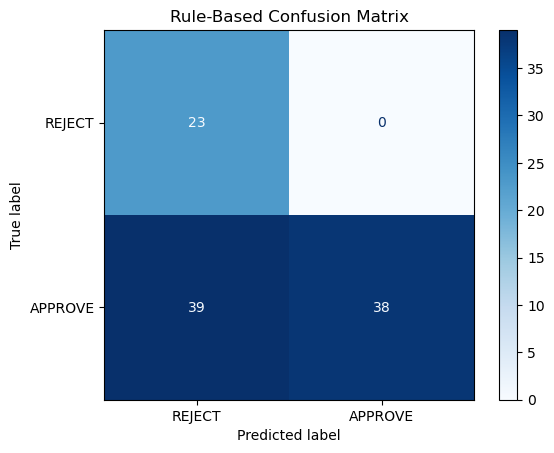

Rule-based accuracy: 61.00%


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def classify_certificate(row):
    """Version 1: Simple rule-based logic"""
    
    # Rule 1: Check expiry
    if row['days_to_expiry'] < 60:
        return 0, 'Expired'
    
    # Rule 2: Check critical parameter
    if row['purity_percent'] < 80.0:
        return 0, 'Low purity'
    
    # Rule 3: Check vendor reliability
    if row['vendor_score'] < 3.0:
        return 0, 'Unreliable vendor'
    
    return 1, 'Passed basic checks'

data = pd.read_csv("sample_data.csv")
results = []
for idx, row in data.iterrows():
    decision, reason = classify_certificate(row)
    results.append({'cert_id': row['cert_id'], 
                    'days_to_expiry': row['days_to_expiry'],
                    'purity_percent': row['purity_percent'],
                    'vendor_score': row['vendor_score'],
                    'decision': decision, 
                    'reason': reason})

results_df = pd.DataFrame(results)
results_df.to_csv("results.csv")

# Confusion matrix actual vs rules based decision
cm = confusion_matrix(data['actual_decision'], results_df['decision'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['REJECT', 'APPROVE'])
disp.plot(cmap='Blues')
plt.title('Rule-Based Confusion Matrix')
plt.show()

# Calculate accuracy 
accuracy_logical = (results_df['decision'] == data['actual_decision']).mean()
data['decision'] = results_df['decision']
print(f"Rule-based accuracy: {accuracy_logical:.2%}")





In above results, we can clearly see false negatives (or type 2 errors) are more, which would be reason for lower accuracy, 
now lets try to build a model to fit the data based on inputs/features.

***Below Code demonstrates how simple logistic regression can improve the accuracy***
We will try to split our training data set by 50 % of of our sample data, then try to test remaining 50 % of data to check if our model has higher accuracy in prodicting the outcome.





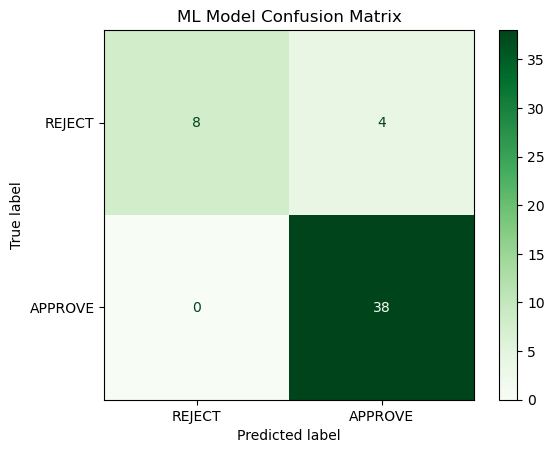

ML Model Accuracy: 92.00%

Detailed Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.90      1.00      0.95        38

    accuracy                           0.92        50
   macro avg       0.95      0.83      0.88        50
weighted avg       0.93      0.92      0.91        50

Improvement over rules: 31.00%


In [49]:
#ML based model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = pd.read_csv('sample_data.csv')



# Features and target
X = data[['days_to_expiry', 'purity_percent', 'vendor_score']]
y = data['actual_decision']  # 0=REJECT, 1=APPROVE

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Train ML model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix for ML
cm_ml = confusion_matrix(y_test, y_pred)
disp_ml = ConfusionMatrixDisplay(confusion_matrix=cm_ml, display_labels=['REJECT', 'APPROVE'])
disp_ml.plot(cmap='Greens')
plt.title('ML Model Confusion Matrix')
plt.show()



print(f"ML Model Accuracy: {accuracy:.2%}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred))

# Compare to rule-based
print(f"Improvement over rules: {accuracy - accuracy_logical :.2%}")


As you can see, the model has 31% higher accuracy then our earlier logic code. and zero false negatives.

***Below we will just compare the accuracy of both logic and logistic regression model.***

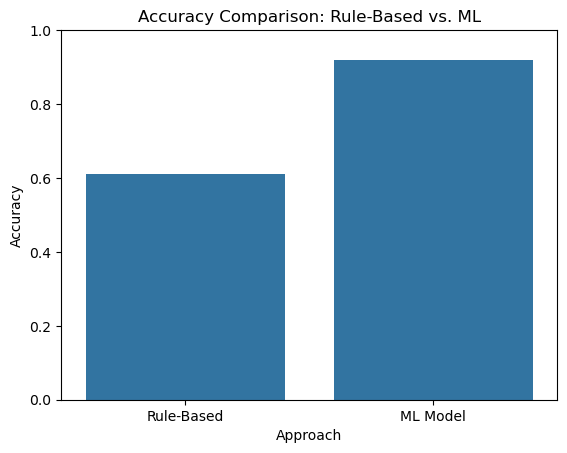

In [50]:
# Accuracy comparison bar plot
accuracies = {'Rule-Based': (results_df['decision'] == data['actual_decision']).mean(),
              'ML Model': accuracy}
acc_df = pd.DataFrame(list(accuracies.items()), columns=['Approach', 'Accuracy'])
sns.barplot(x='Approach', y='Accuracy', data=acc_df)
plt.title('Accuracy Comparison: Rule-Based vs. ML')
plt.ylim(0, 1)  # Scale to 0-100%
plt.show()

actual_decision
0    73
2    16
1    11
Name: count, dtype: int64
Multi-Class ML Model Accuracy: 80.00%

Detailed Report:
              precision    recall  f1-score   support

      Reject       0.97      0.82      0.89        38
     Approve       0.75      1.00      0.86         6
Needs Review       0.30      0.50      0.38         6

    accuracy                           0.80        50
   macro avg       0.67      0.77      0.71        50
weighted avg       0.86      0.80      0.82        50



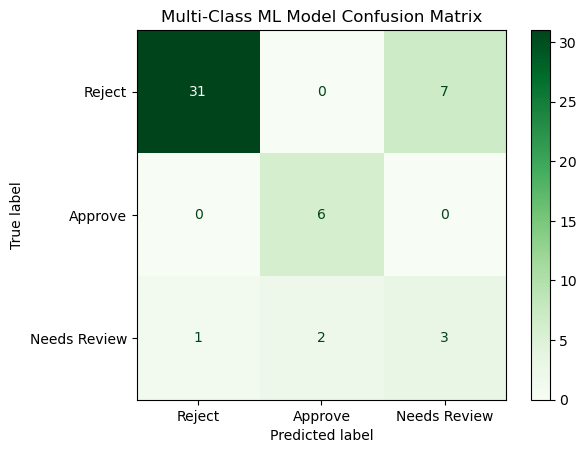